In [1]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [2]:
#EDA Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#importing the Tensorflow library which helps us to build the Cool Deep learning models
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
#importing os lib for paths 
import os
#LabelEncoder will helps us to encode the labels and after that we can decode anyways~!!
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#to see the images lets use PIL library
from PIL import Image
#Evaluation Metrics
from sklearn.metrics import classification_report, f1_score , confusion_matrix

import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers  # Import necessary modules

2024-03-07 11:08:36.361123: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-07 11:08:36.361207: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-07 11:08:36.467719: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
print(tf.__version__)

2.15.0


In [4]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [5]:
# Define the dataset path
dataset_path = "/kaggle/input/animal-image-dataset-90-different-animals/animals/animals"


In [6]:
category_belongs=os.listdir(dataset_path)
# category_belongs.pop(6)
print(category_belongs)
len(category_belongs)

['beetle', 'parrot', 'fox', 'wolf', 'hedgehog', 'turtle', 'snake', 'shark', 'horse', 'antelope', 'hamster', 'woodpecker', 'eagle', 'chimpanzee', 'bison', 'penguin', 'butterfly', 'sandpiper', 'hornbill', 'lion', 'lobster', 'oyster', 'otter', 'grasshopper', 'raccoon', 'dog', 'pigeon', 'donkey', 'hippopotamus', 'hummingbird', 'bear', 'coyote', 'bee', 'pig', 'rat', 'owl', 'caterpillar', 'koala', 'squid', 'hare', 'whale', 'mouse', 'tiger', 'fly', 'lizard', 'orangutan', 'bat', 'porcupine', 'kangaroo', 'gorilla', 'starfish', 'mosquito', 'crow', 'possum', 'goldfish', 'swan', 'elephant', 'sheep', 'dragonfly', 'zebra', 'seal', 'octopus', 'cow', 'ox', 'wombat', 'reindeer', 'panda', 'duck', 'goose', 'goat', 'badger', 'flamingo', 'crab', 'seahorse', 'rhinoceros', 'dolphin', 'okapi', 'moth', 'sparrow', 'pelecaniformes', 'squirrel', 'leopard', 'jellyfish', 'ladybugs', 'cockroach', 'hyena', 'cat', 'deer', 'turkey', 'boar']


90

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder to the class names and transform them into integer labels
encoded_classes = label_encoder.fit_transform(category_belongs)

# Snake and Not-Snake (one-vs-rest classification)

In [8]:
def load_and_preprocess_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3) 
    img = tf.image.resize(img, [128, 128])
    img = tf.cast(img, tf.float32) / 255.0
    return img

In [9]:
import glob
import pathlib
snake_files = glob.glob(os.path.join(dataset_path, 'snake', "*"))
snake_labels = [0]*len(snake_files)
non_snake_files = [ i for i in glob.glob(dataset_path+"/*/*") if pathlib.Path(i).parent.name != 'snake']
non_snake_labels = [1]*len(non_snake_files)
print(len(snake_files),len(non_snake_files))

60 5340


In [10]:
bat_files = glob.glob(os.path.join(dataset_path, 'bat', "*"))
bat_labels = [1]*len(bat_files)

In [11]:
images = snake_files+non_snake_files
labels = snake_labels+non_snake_labels
dataset = tf.data.Dataset.from_tensor_slices((images, labels))
dataset = dataset.map(lambda x,y:(load_and_preprocess_image(x),y))
dataset = dataset.batch(32)
del images,labels

In [12]:
images=snake_files+bat_files
labels=snake_labels+bat_labels
ba_dataset = tf.data.Dataset.from_tensor_slices((images, labels))
ba_dataset = ba_dataset.map(lambda x,y:(load_and_preprocess_image(x),y))
bat_dataset = ba_dataset.batch(32)
del images , labels

In [13]:
antelope = glob.glob(os.path.join(dataset_path, 'anelope', "*"))
antelope_labels = [0]*len(antelope)
butterfly = glob.glob(os.path.join(dataset_path, 'butterfly', "*"))
butterfly_labels = [1]*len(butterfly)
cat = glob.glob(os.path.join(dataset_path, 'cat', "*"))
cat_labels = [2]*len(cat)
cow = glob.glob(os.path.join(dataset_path, 'cow', "*"))
cow_labels = [3]*len(cow)
dog = glob.glob(os.path.join(dataset_path, 'dog', "*"))
dog_labels = [4]*len(dog)
images=antelope+butterfly+cat+cow+dog
labels=antelope_labels+butterfly_labels+cat_labels+cow_labels+dog_labels
fi_dataset = tf.data.Dataset.from_tensor_slices((images, labels))
fi_dataset = fi_dataset.map(lambda x,y:(load_and_preprocess_image(x),y))
five_dataset = fi_dataset.batch(32)

In [14]:
# Custom CNN model architecture
def create_custom_model(input_shape,num_outputs=2):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.2),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Conv2D(64, (3, 3), activation='leaky_relu'),
        layers.Flatten(),
        layers.Dense(64, activation='leaky_relu'),
        layers.Dense(num_outputs, activation='softmax')  # Binary classification, so use sigmoid activation
    ])
    return model

# Create the model
model = create_custom_model((128, 128, 3))

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 63, 63, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 238144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    15,241,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,260,930 (58.22 MB)

 Trainable params: 15,260,866 (58.22 MB)

 Non-trainable params: 64 (256.00 B)

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

class ActivationMapCallback(tf.keras.callbacks.Callback):
    def __init__(self, layer_name, dataset):
        super(ActivationMapCallback, self).__init__()
        self.layer_name = layer_name
        self.dataset = dataset

    def on_epoch_end(self, epoch, logs=None):
        # Get the activation model
        activation_model = tf.keras.models.Model(inputs=self.model.inputs,
                                                  outputs=self.model.get_layer(self.layer_name).output)
        self.dataset.shuffle(128)
        sample_images = next(iter(self.dataset.take(1)))[0][0]
        print(sample_images.shape)
        activations = activation_model.predict(np.expand_dims(sample_images,axis=0))

        # Plot original image
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(sample_images)
        plt.title('Input Image')
        plt.axis('off')

        # Plot activation map
        plt.subplot(1, 2, 2)
        plt.imshow(activations[0, :, :, 0], cmap='viridis')  # Assuming the first channel of activation
        plt.title('Activation Map')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

In [35]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Epoch 1/15
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8728 - loss: 2.5914(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


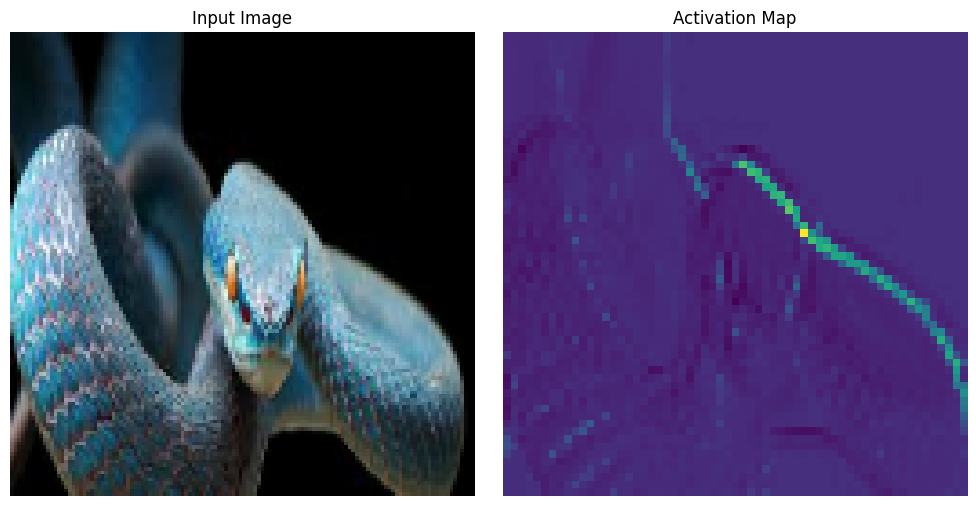

169/169 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - accuracy: 0.8734 - loss: 2.5793
Epoch 2/15
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8943 - loss: 4.2971(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


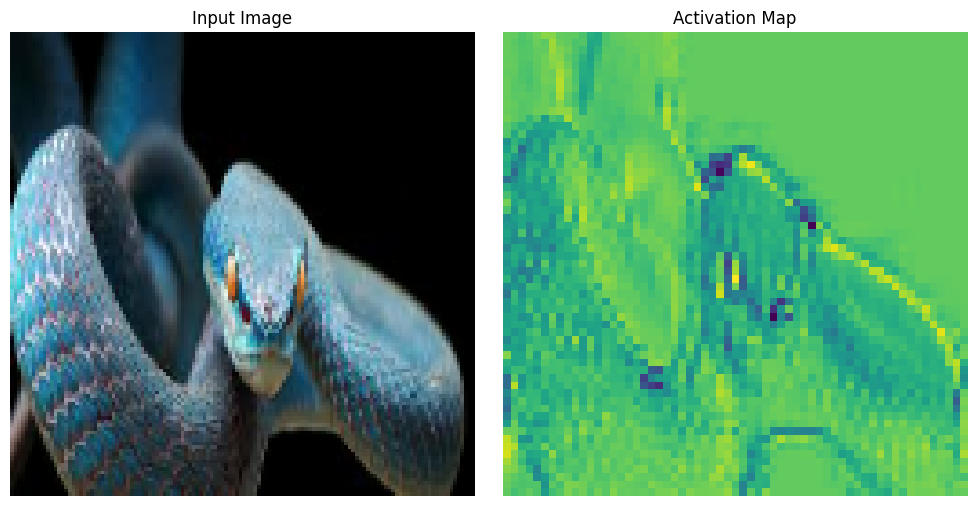

169/169 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.8948 - loss: 4.2769
Epoch 3/15
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8846 - loss: 7.5690(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


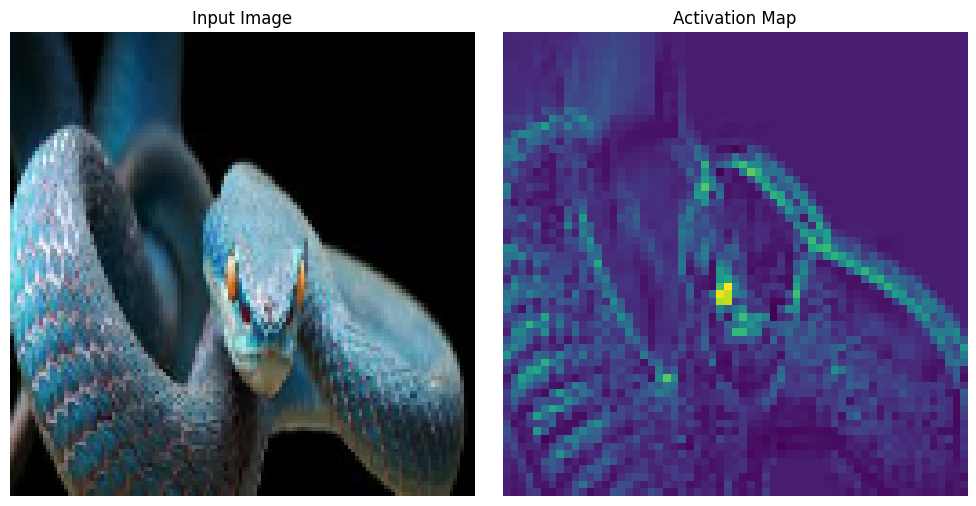

169/169 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 0.8851 - loss: 7.5343
Epoch 4/15
168/169 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8704 - loss: 26.5718(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


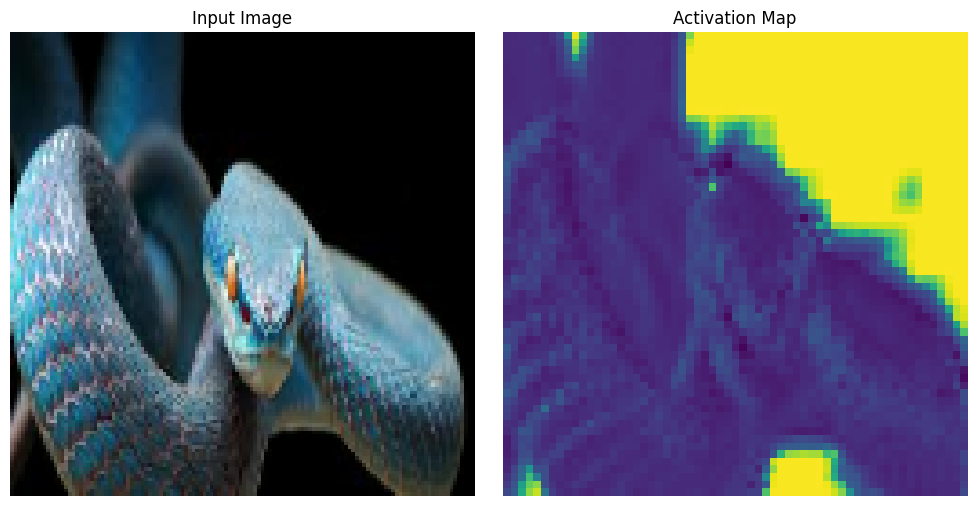

169/169 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.8715 - loss: 26.3210
Epoch 5/15
168/169 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9272 - loss: 7.1773(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


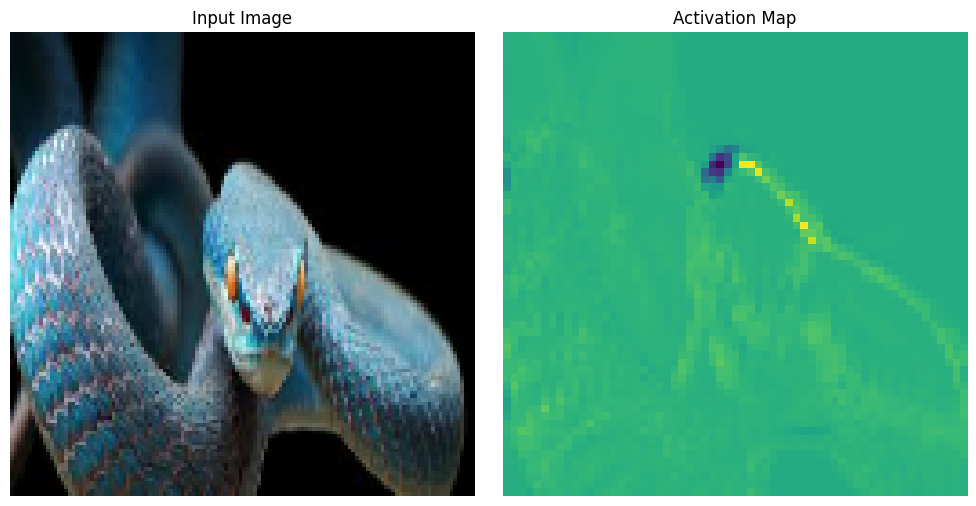

169/169 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - accuracy: 0.9279 - loss: 7.1090
Epoch 6/15
168/169 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9331 - loss: 17.2336(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


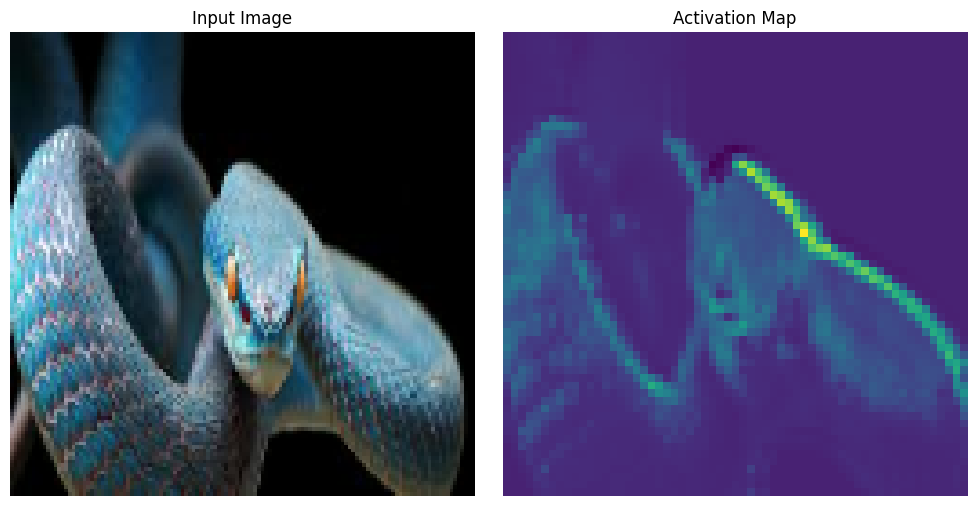

169/169 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.9337 - loss: 17.0687
Epoch 7/15
168/169 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9011 - loss: 14.6501(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


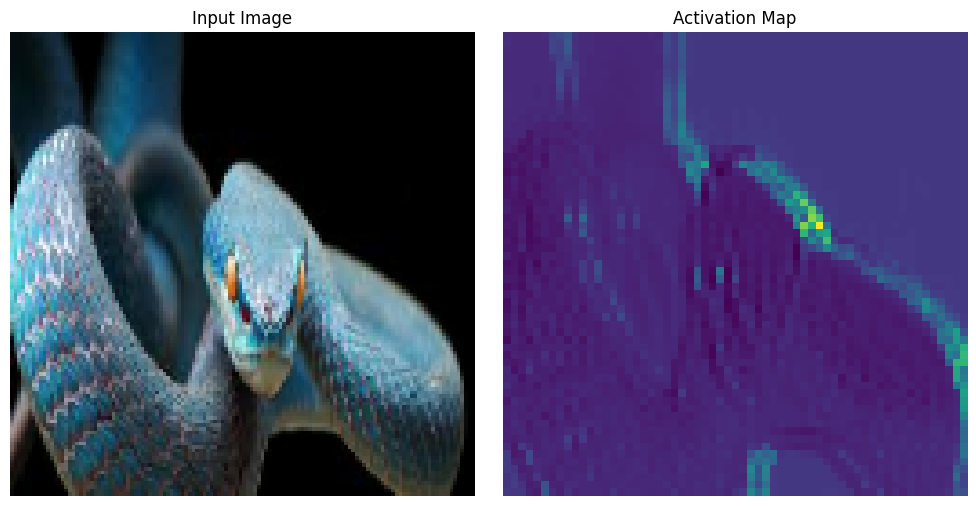

169/169 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.9020 - loss: 14.5108
Epoch 8/15
168/169 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9123 - loss: 3.6194(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


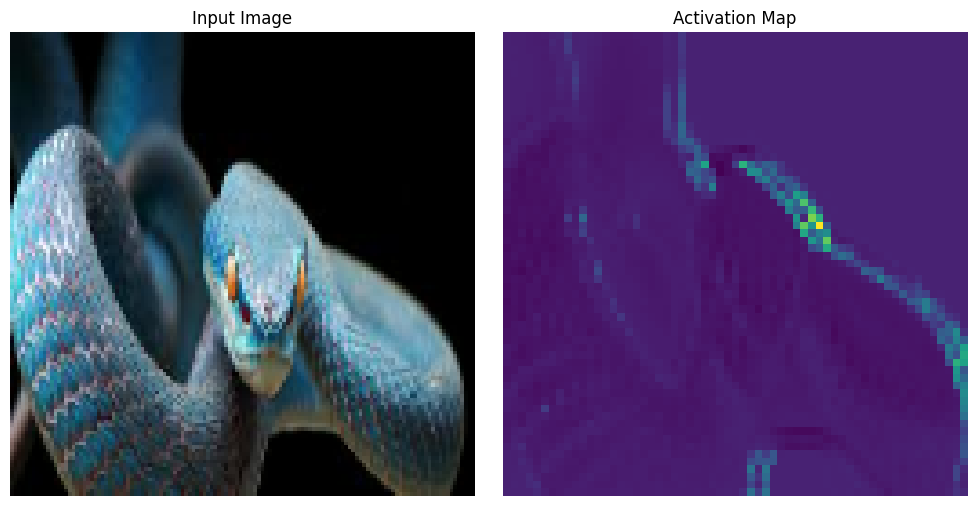

169/169 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.9131 - loss: 3.5855
Epoch 9/15
168/169 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9589 - loss: 0.5717(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


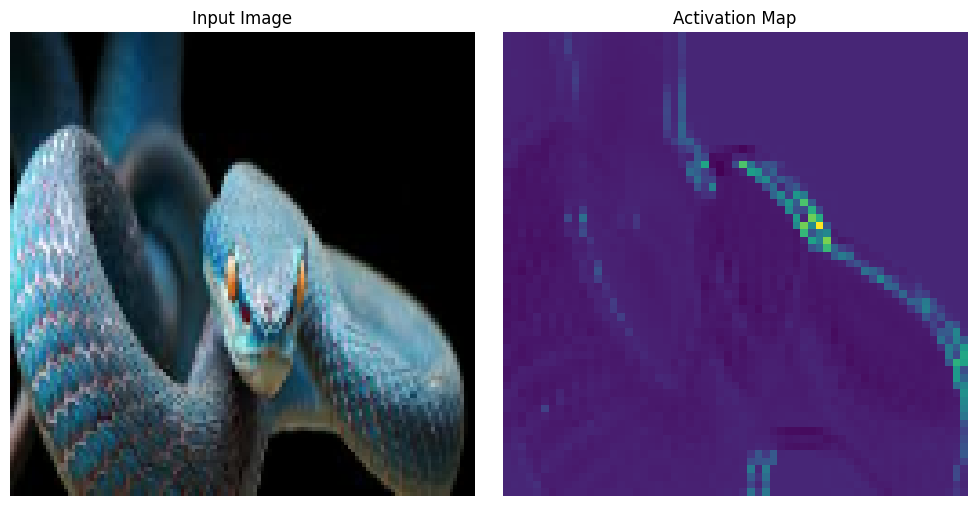

169/169 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.9593 - loss: 0.5664
Epoch 10/15
168/169 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9767 - loss: 0.1961(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


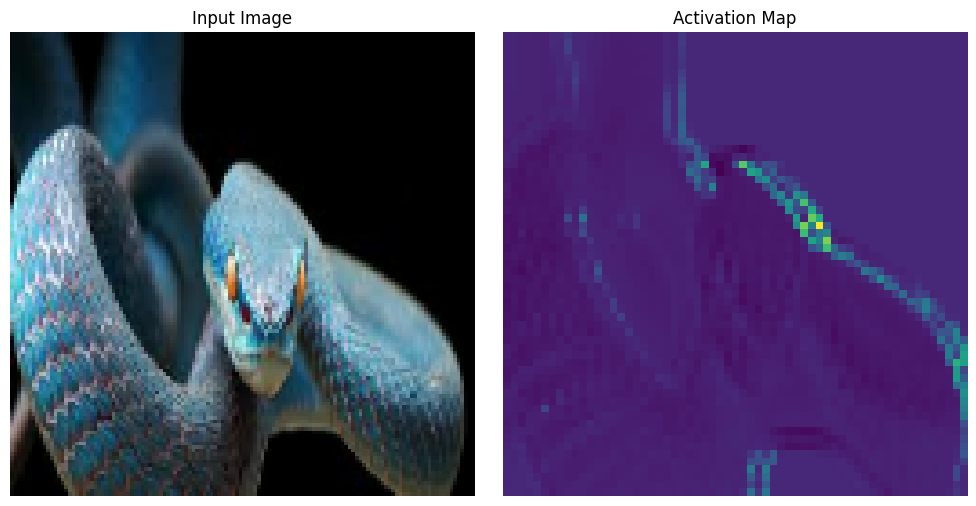

169/169 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.9769 - loss: 0.1943
Epoch 11/15
168/169 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9850 - loss: 0.0850(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


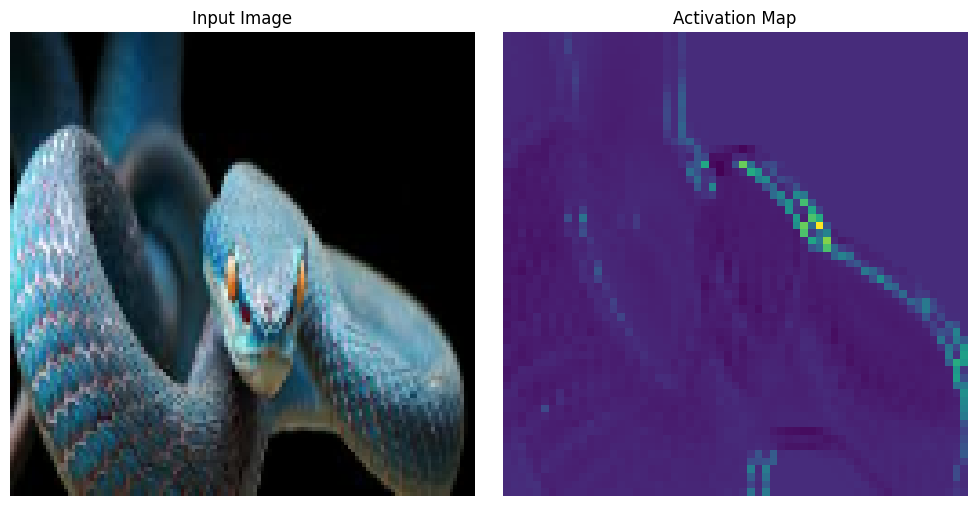

169/169 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 0.9851 - loss: 0.0842
Epoch 12/15
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9856 - loss: 0.0694(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


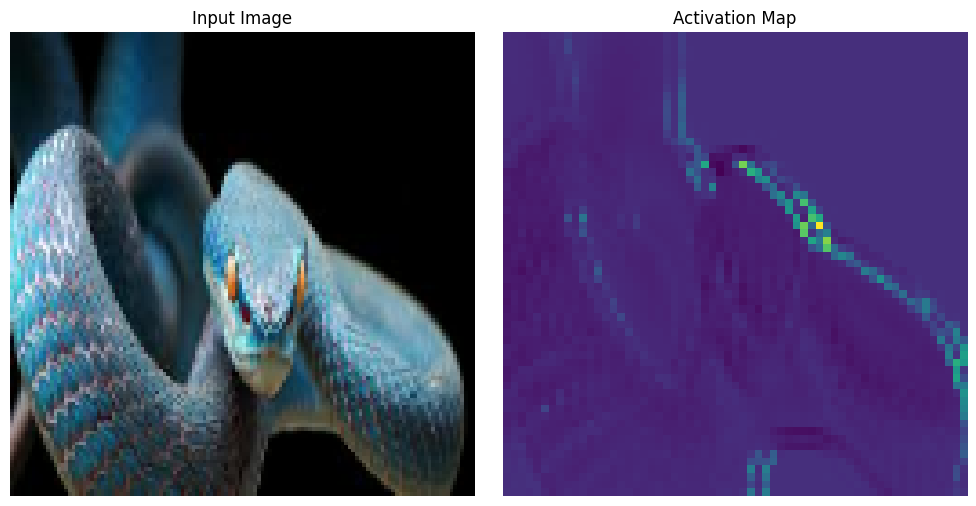

169/169 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.9857 - loss: 0.0691
Epoch 13/15
168/169 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9917 - loss: 0.0533(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


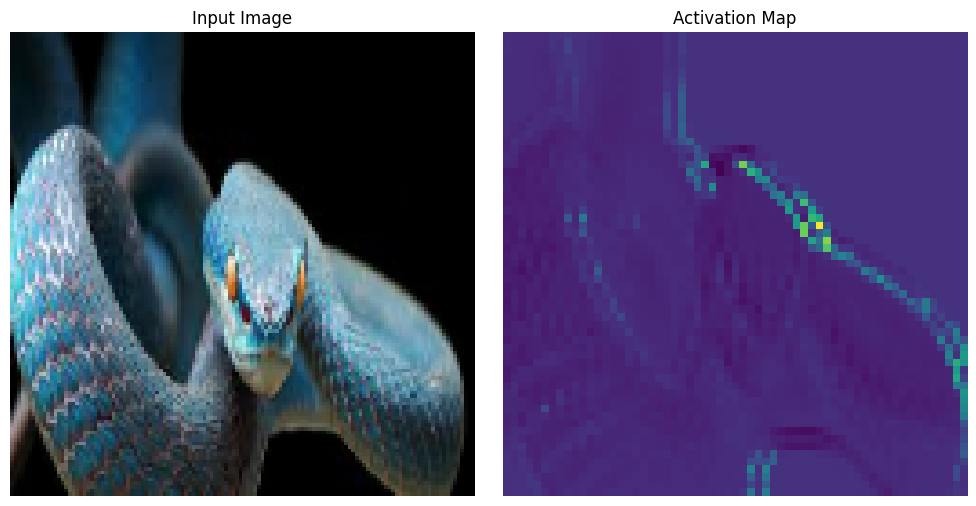

169/169 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.9918 - loss: 0.0529
Epoch 14/15
168/169 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9895 - loss: 0.0514(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


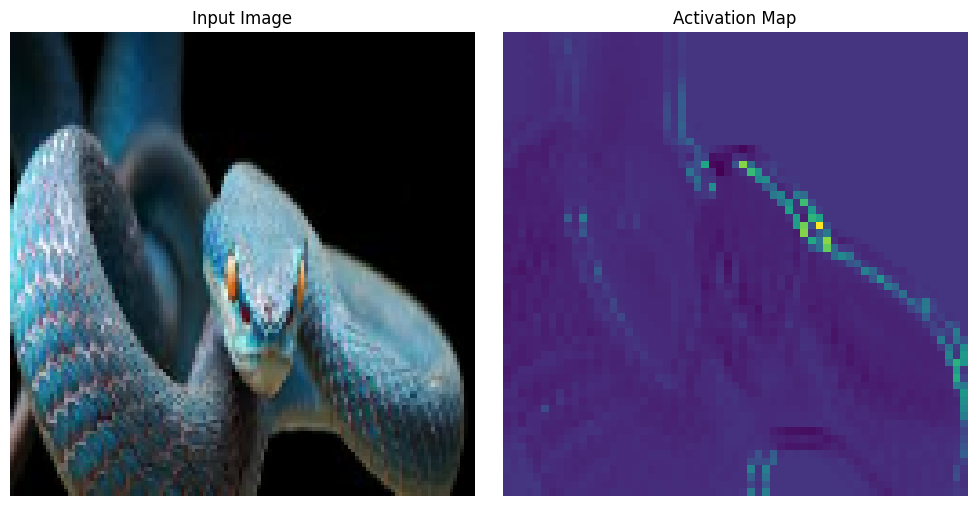

169/169 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.9895 - loss: 0.0509
Epoch 15/15
168/169 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9904 - loss: 0.0338(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


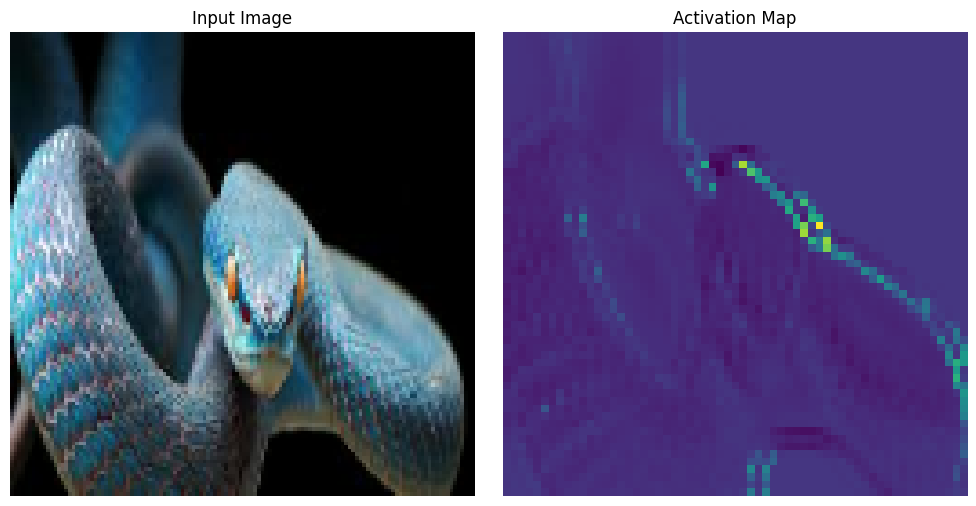

169/169 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.9904 - loss: 0.0335


In [36]:
# Train the model
history=model.fit(dataset, epochs=15,callbacks=[ActivationMapCallback('conv2d_1',dataset)])

In [37]:
model2 = create_custom_model((128, 128, 3))

model2.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 63, 63, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 238144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │    15,241,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,260,930 (58.22 MB)

 Trainable params: 15,260,866 (58.22 MB)

 Non-trainable params: 64 (256.00 B)

In [38]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7656 - loss: 12.1599   (128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


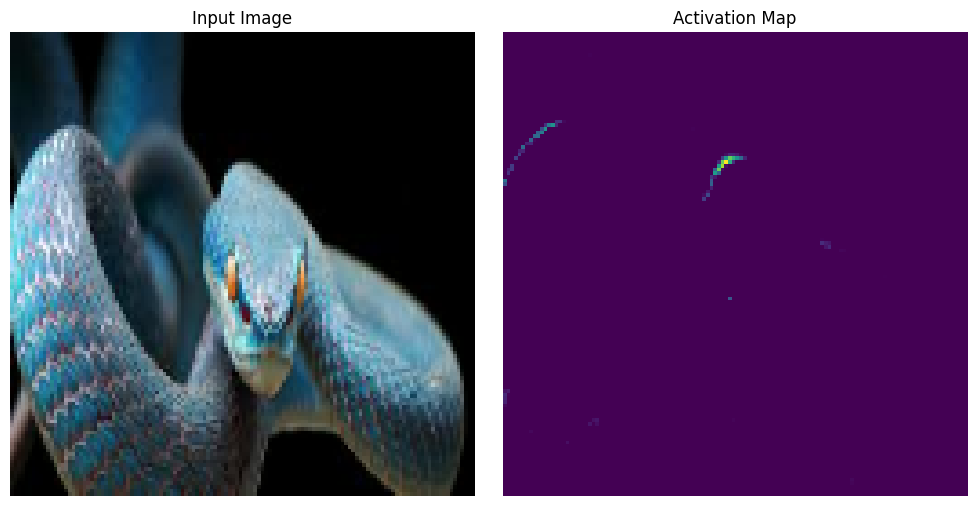

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step - accuracy: 0.7125 - loss: 14.0252
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.2344 - loss: 18.7225   (128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


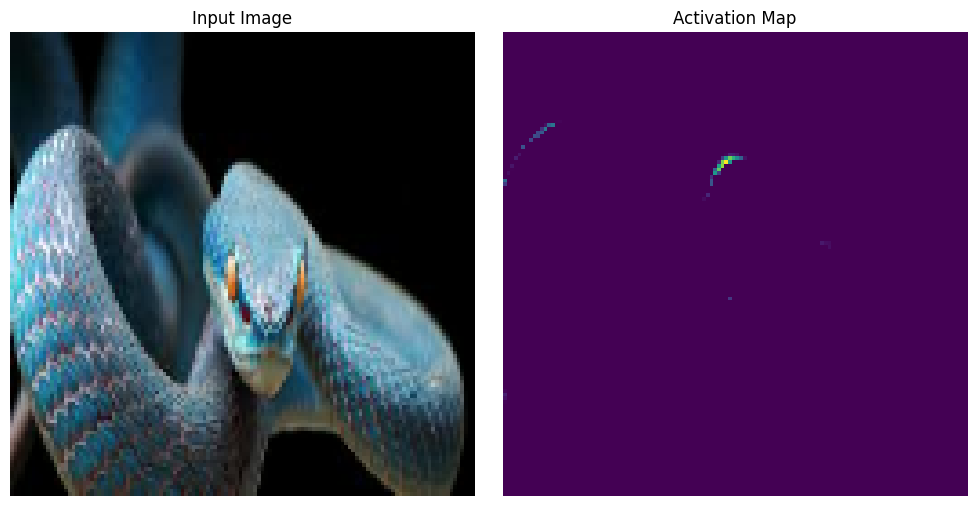

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - accuracy: 0.2875 - loss: 17.5662
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.2344 - loss: 30.3862   (128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


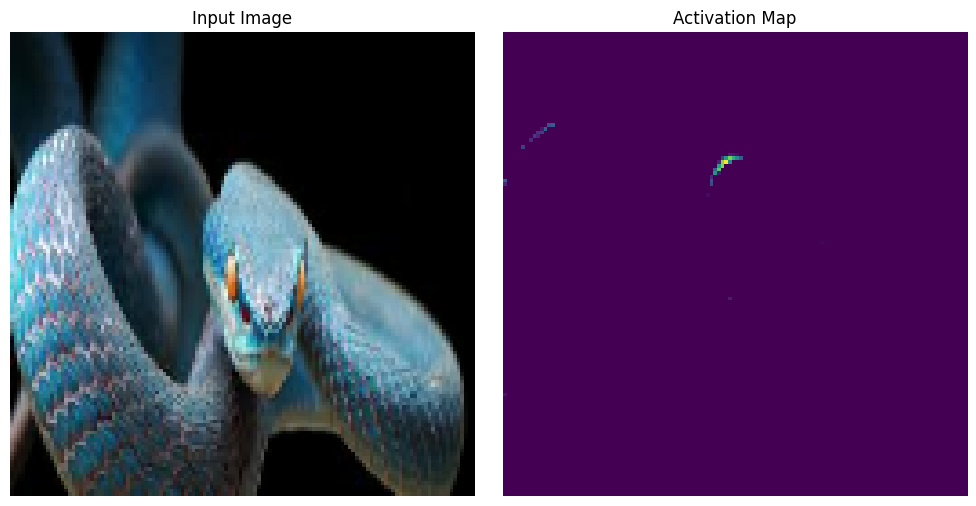

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - accuracy: 0.2875 - loss: 28.0053
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4516 - loss: 3.2810(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


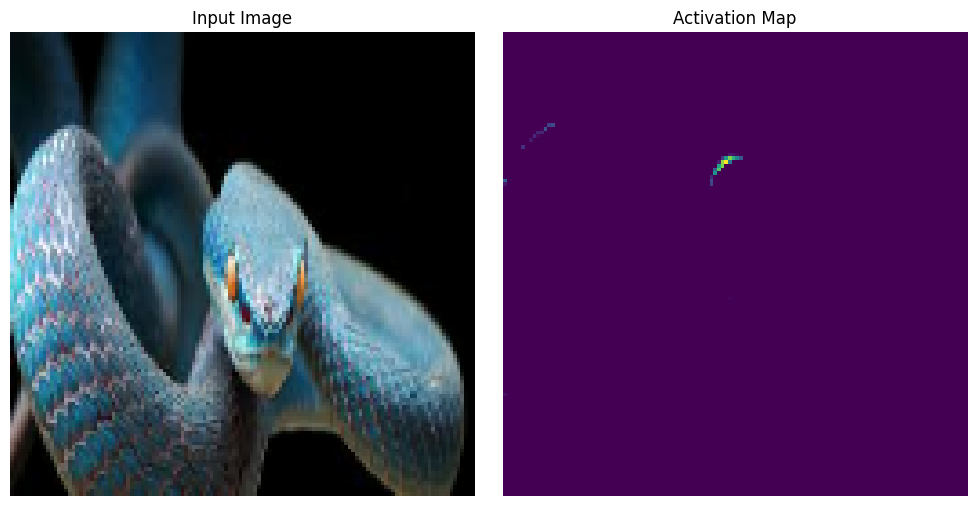

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - accuracy: 0.4329 - loss: 3.5081
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8508 - loss: 0.6184    (128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


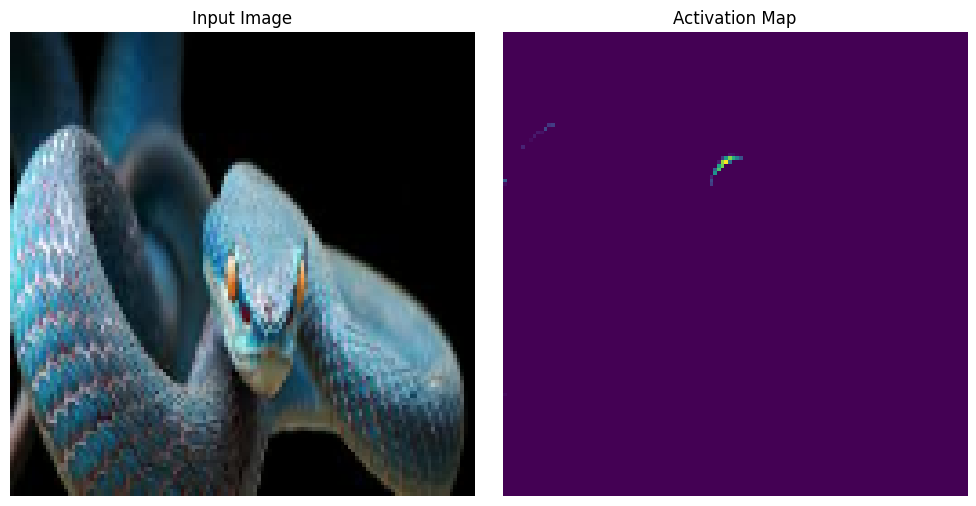

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - accuracy: 0.8290 - loss: 0.6931
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8047 - loss: 0.5905(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


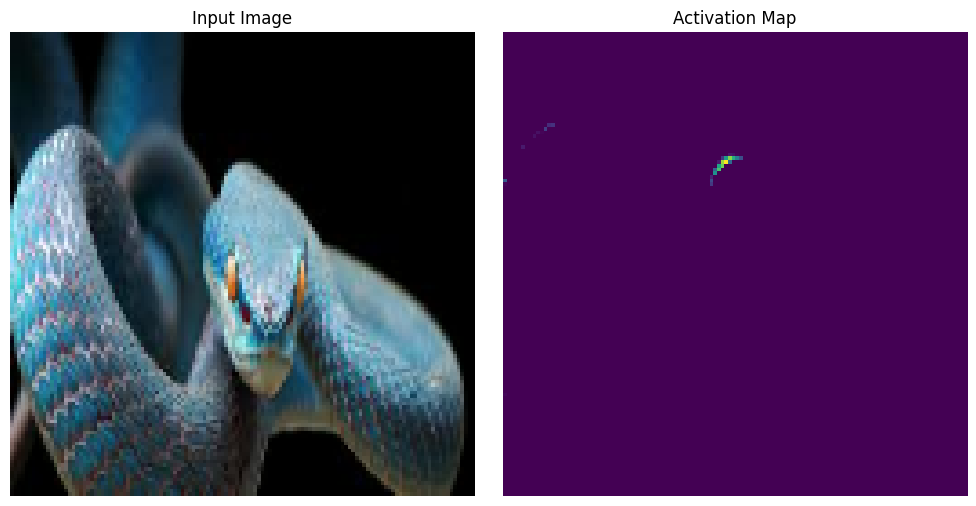

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 245ms/step - accuracy: 0.8104 - loss: 0.5716
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6148 - loss: 1.4101(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


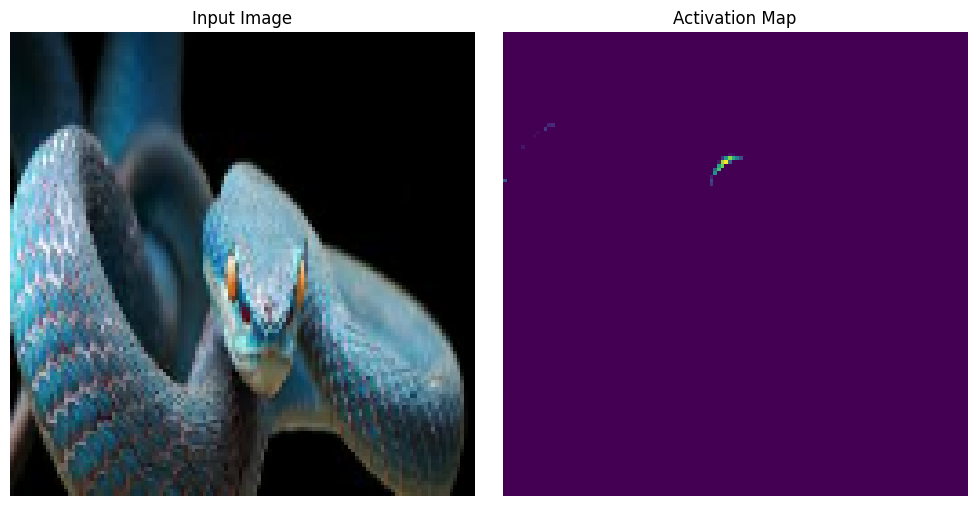

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 267ms/step - accuracy: 0.6369 - loss: 1.3143
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8979 - loss: 0.4711(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


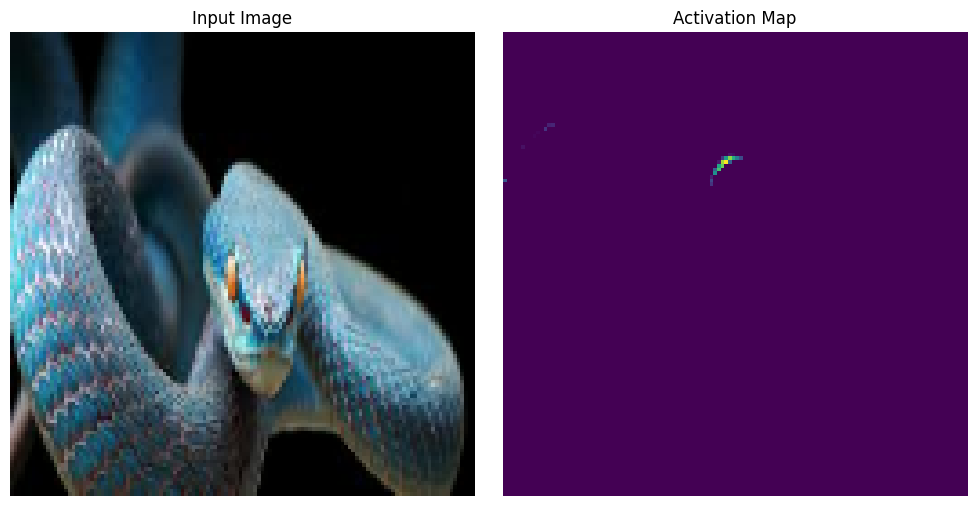

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 249ms/step - accuracy: 0.8783 - loss: 0.5633
Epoch 9/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9906 - loss: 0.0350(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


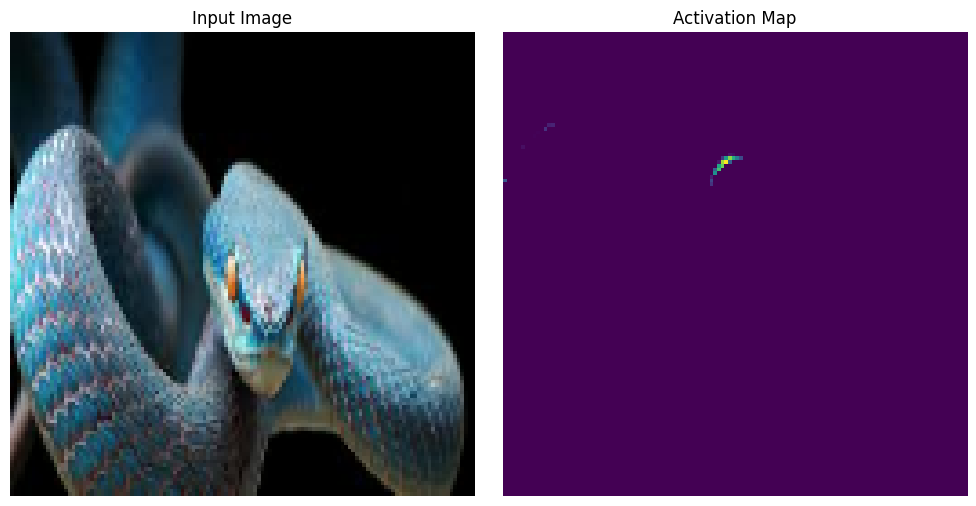

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step - accuracy: 0.9892 - loss: 0.0387
Epoch 10/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9914 - loss: 0.0192(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


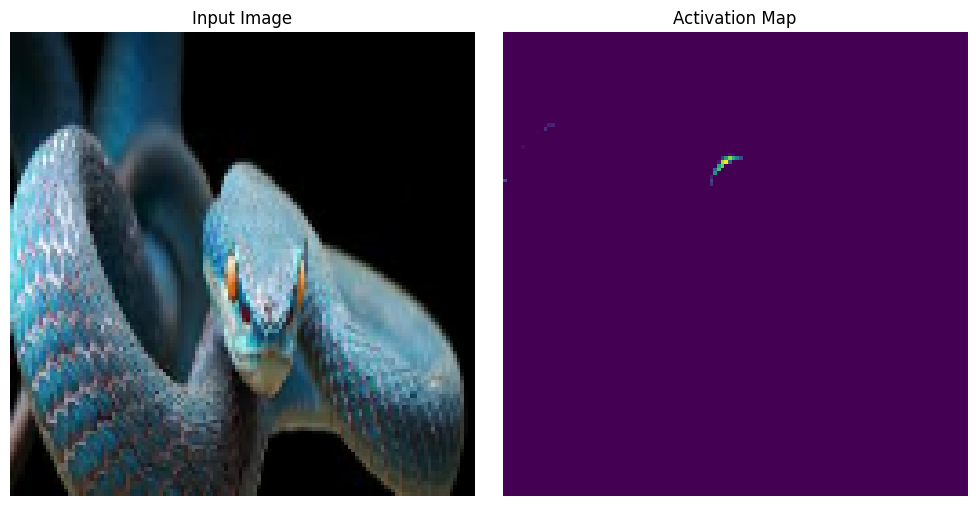

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step - accuracy: 0.9915 - loss: 0.0183
Epoch 11/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9500 - loss: 0.1569(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


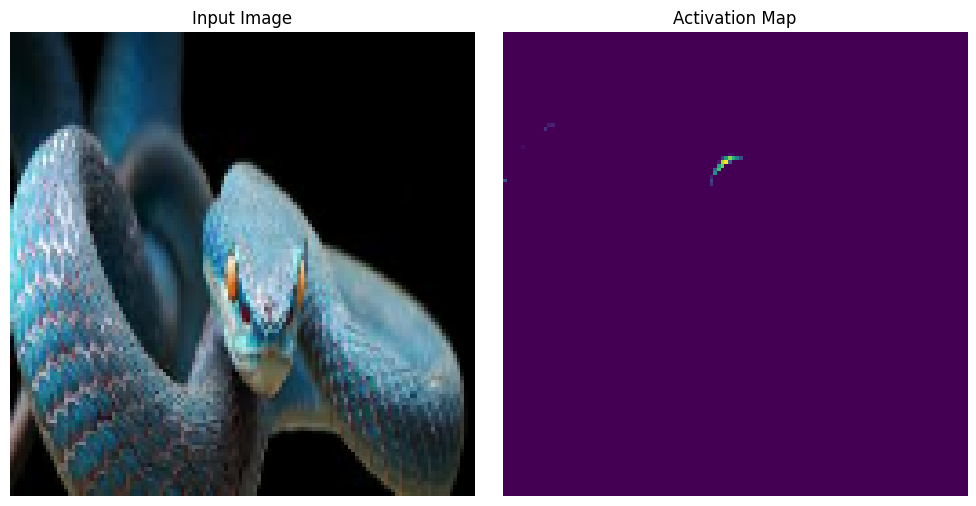

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step - accuracy: 0.9533 - loss: 0.1486
Epoch 12/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9836 - loss: 0.0727(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


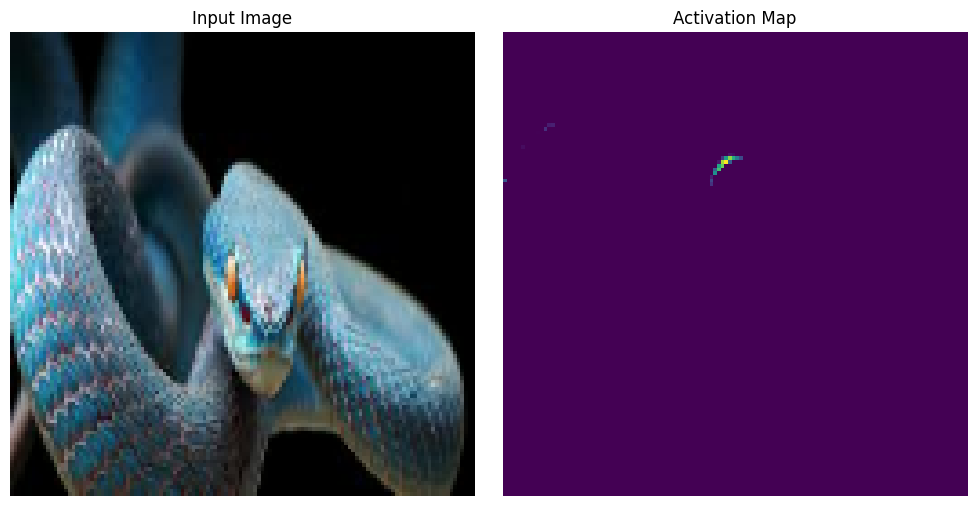

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - accuracy: 0.9852 - loss: 0.0668
Epoch 13/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9836 - loss: 0.0263(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


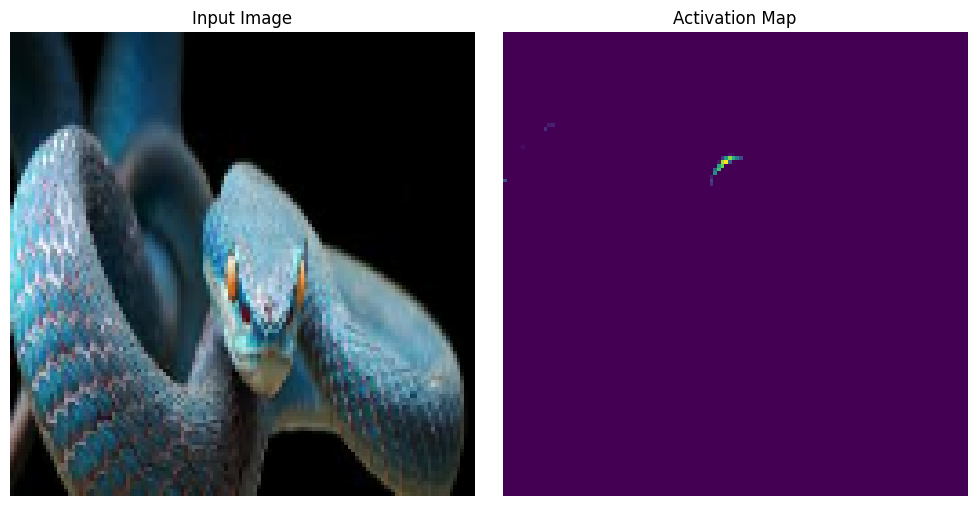

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step - accuracy: 0.9852 - loss: 0.0240
Epoch 14/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 1.0000 - loss: 0.0045(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


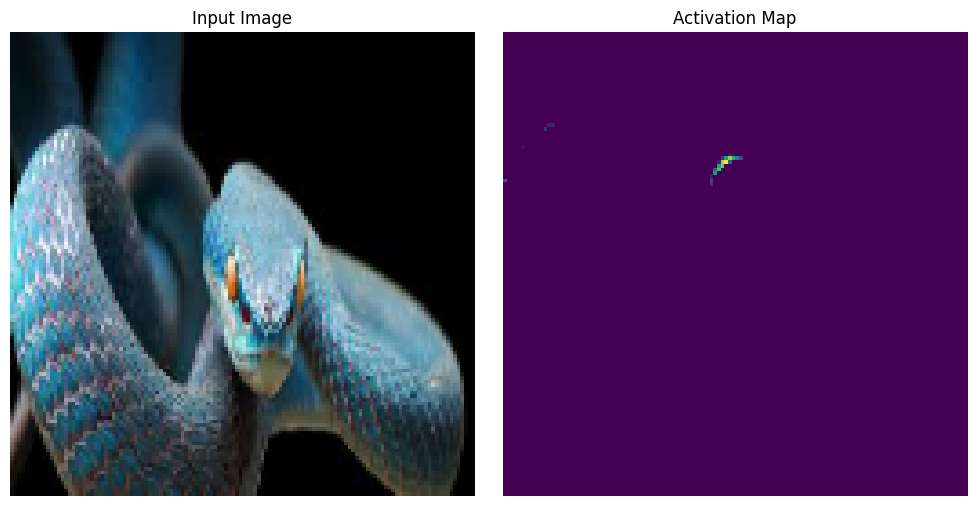

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - accuracy: 1.0000 - loss: 0.0043
Epoch 15/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 1.0000 - loss: 0.0029(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


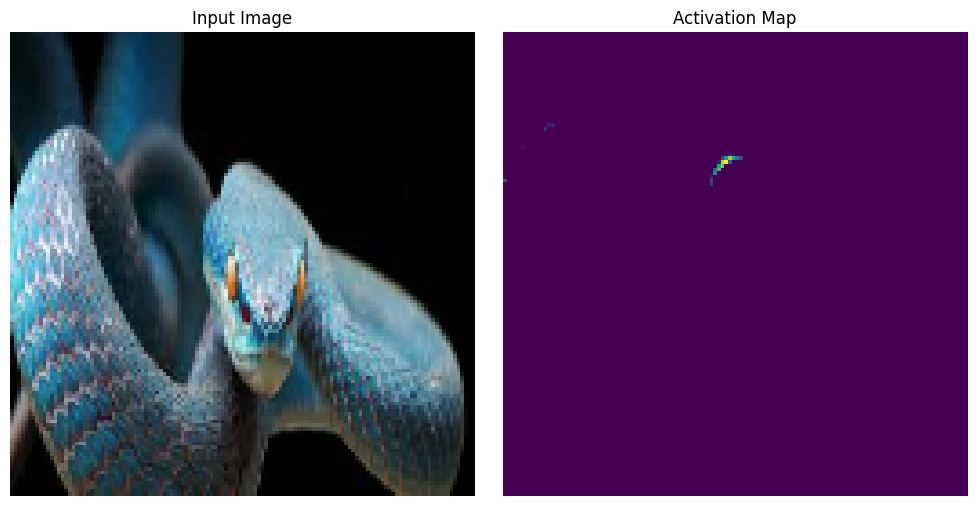

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - accuracy: 1.0000 - loss: 0.0029


In [40]:
# Train the model
history=model2.fit(bat_dataset, epochs=15,callbacks=[ActivationMapCallback('conv2d_4',bat_dataset)])

In [41]:
model3 = create_custom_model((128, 128, 3),5)

model3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 63, 63, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 238144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │    15,241,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,261,125 (58.22 MB)

 Trainable params: 15,261,061 (58.22 MB)

 Non-trainable params: 64 (256.00 B)

In [42]:
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.2101 - loss: 144.8686(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


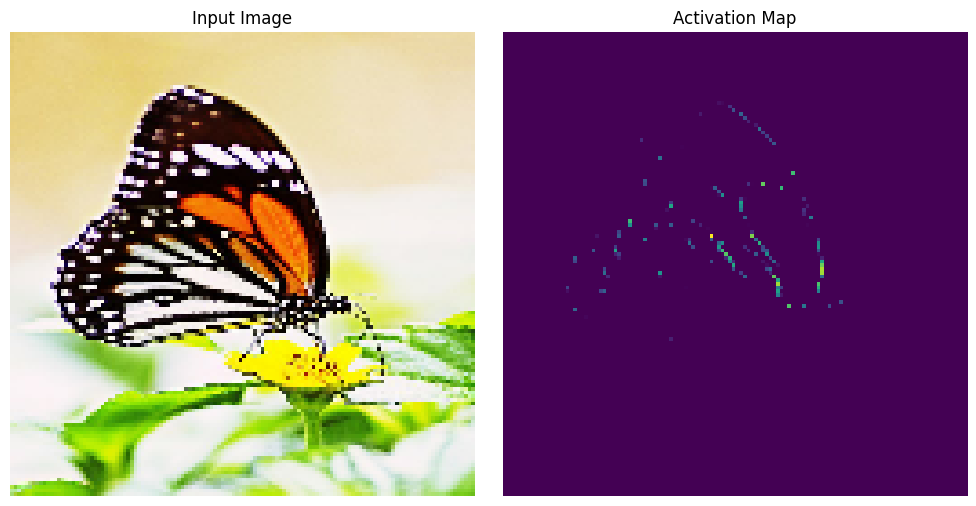

8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 590ms/step - accuracy: 0.2006 - loss: 152.7706
Epoch 2/15
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.1480 - loss: 50.0480(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


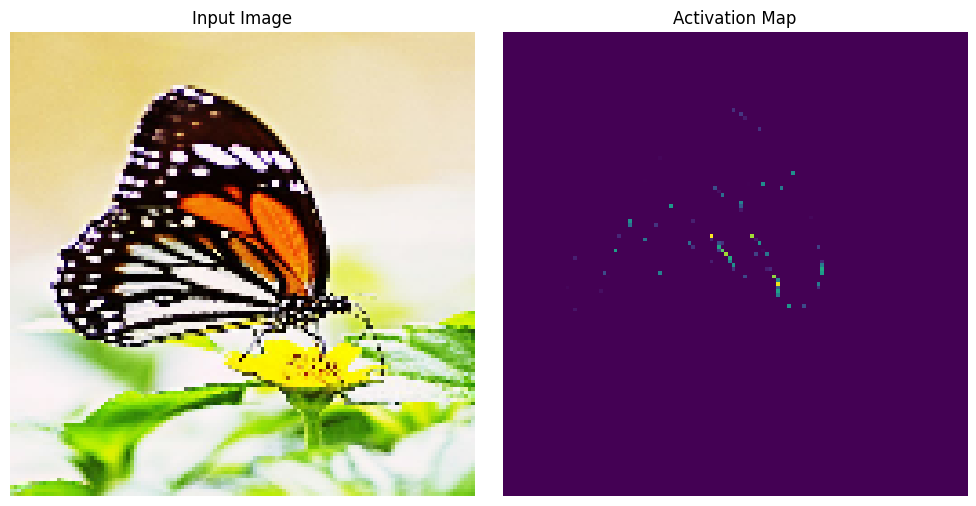

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.2151 - loss: 44.5217
Epoch 3/15
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.0000e+00 - loss: 78.8471(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


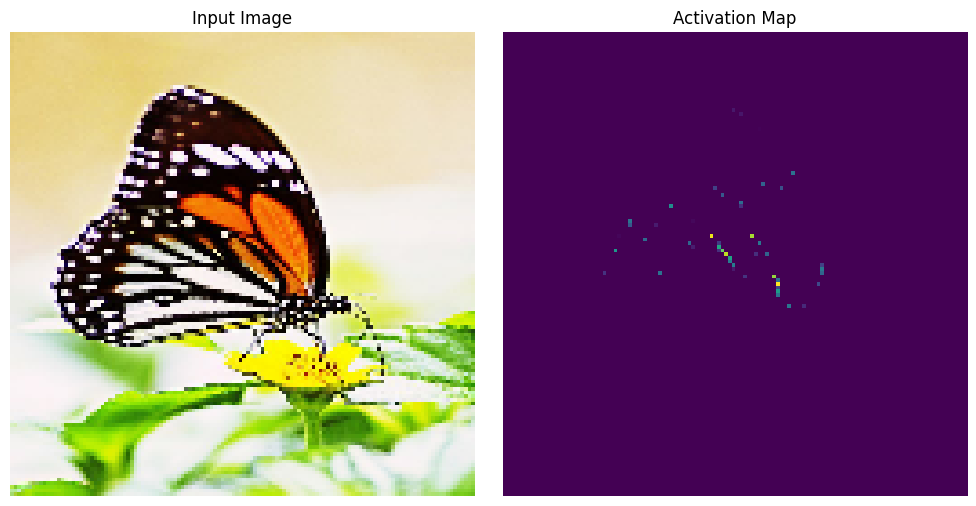

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.0000e+00 - loss: 71.6715
Epoch 4/15
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.0912 - loss: 7.8284(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


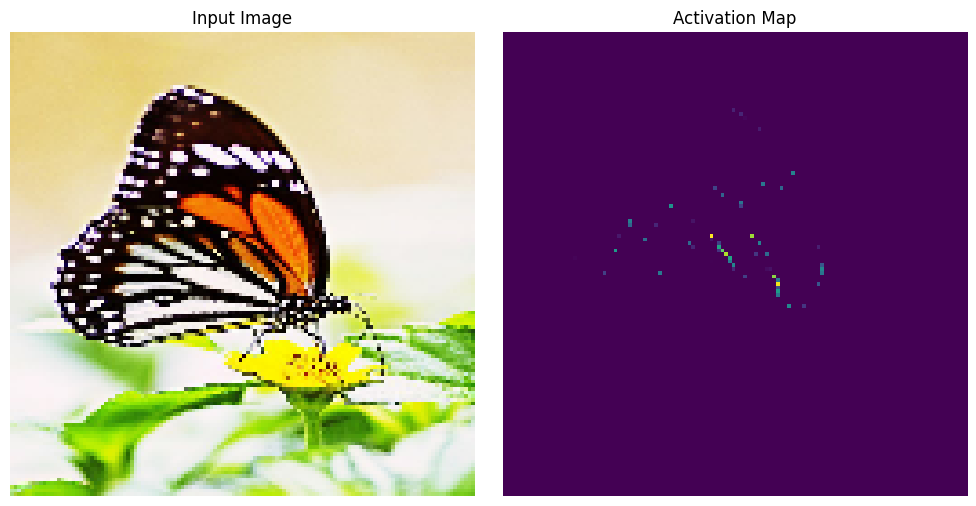

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.0950 - loss: 7.5280
Epoch 5/15
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6080 - loss: 1.9041(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


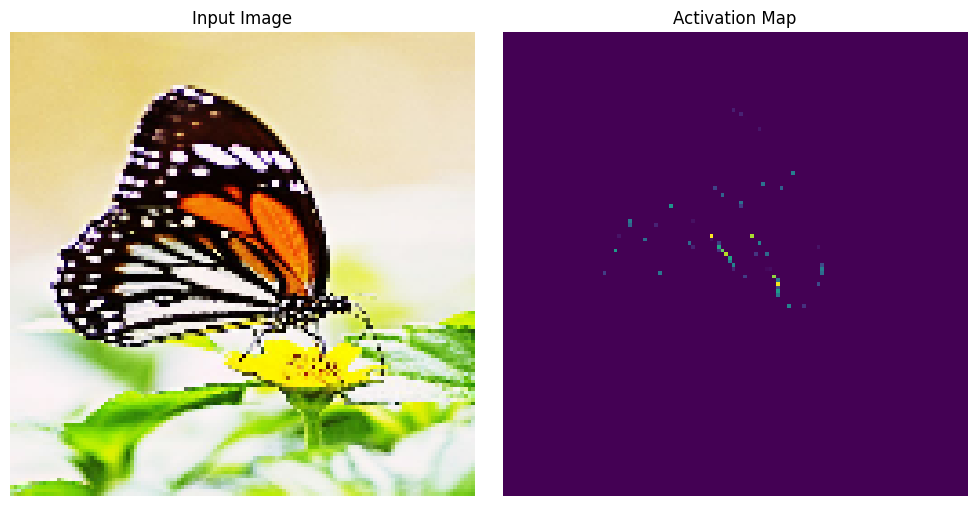

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - accuracy: 0.5831 - loss: 2.0420
Epoch 6/15
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7337 - loss: 0.7071(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


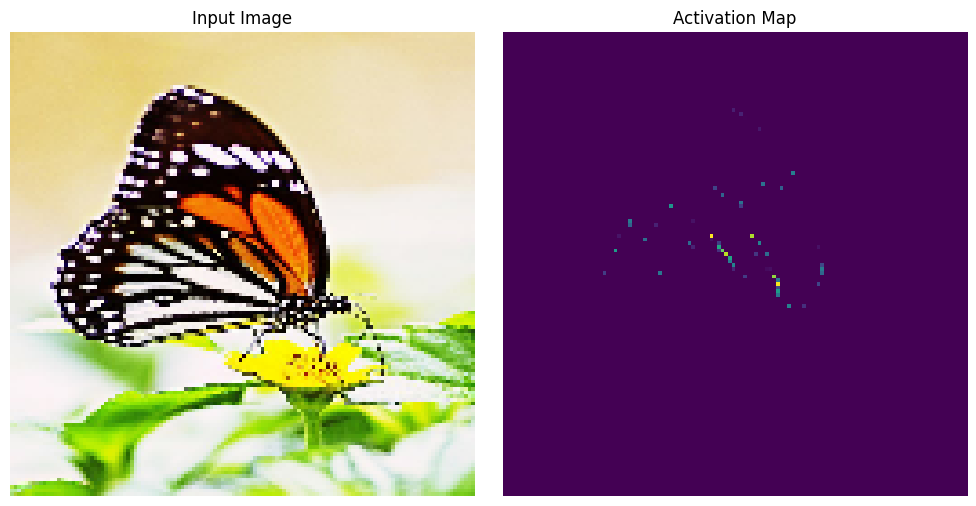

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.7197 - loss: 0.7467
Epoch 7/15
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8015 - loss: 1.0188(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


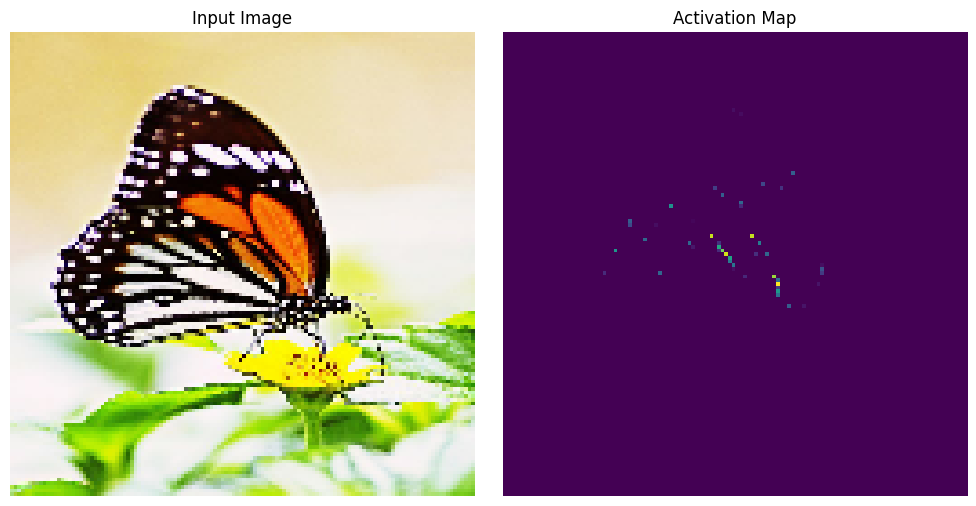

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.7993 - loss: 0.9650
Epoch 8/15
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8044 - loss: 0.5983(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


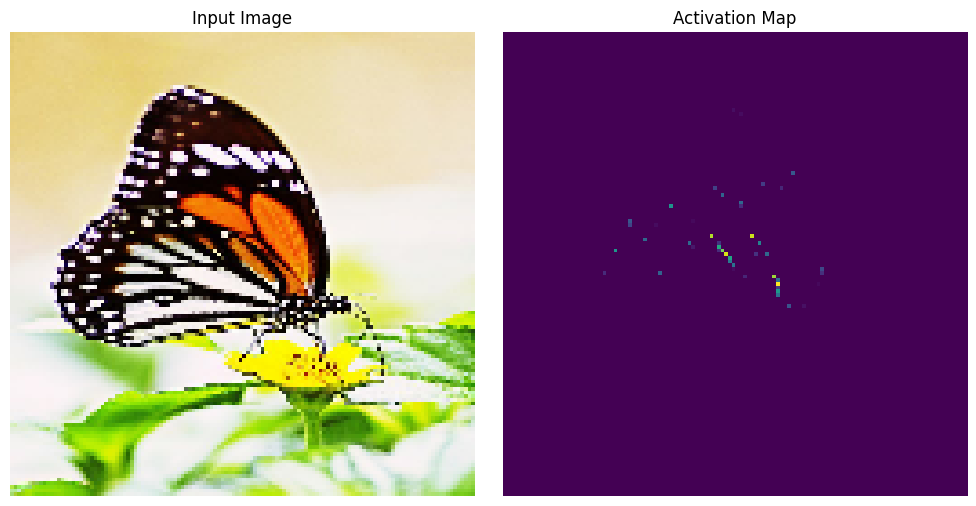

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.8164 - loss: 0.5775
Epoch 9/15
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8496 - loss: 0.3856(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


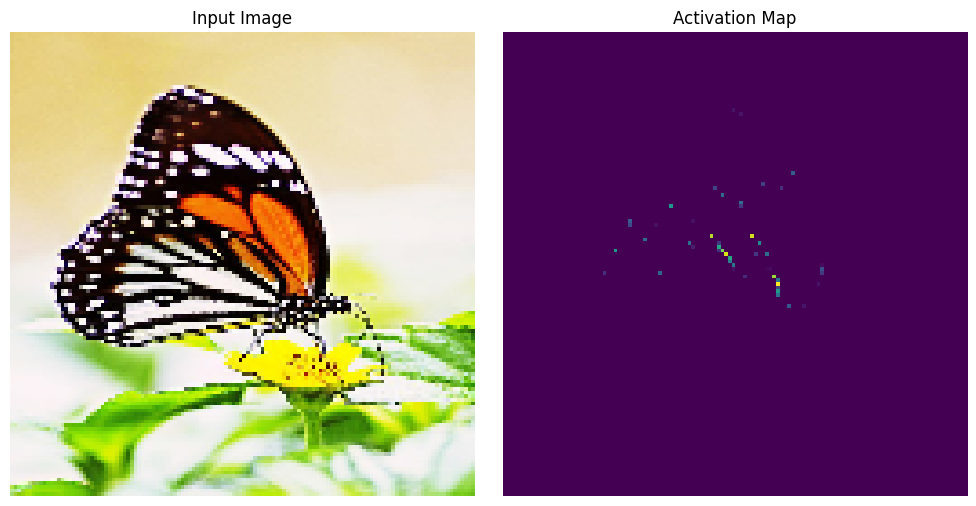

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.8571 - loss: 0.3844
Epoch 10/15
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9459 - loss: 0.2218(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


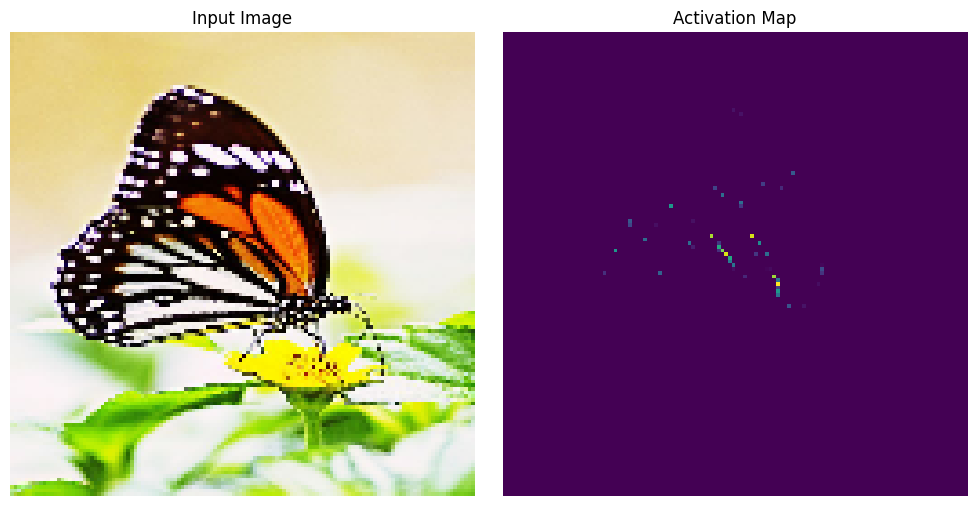

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.9440 - loss: 0.2386
Epoch 11/15
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9846 - loss: 0.1514(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


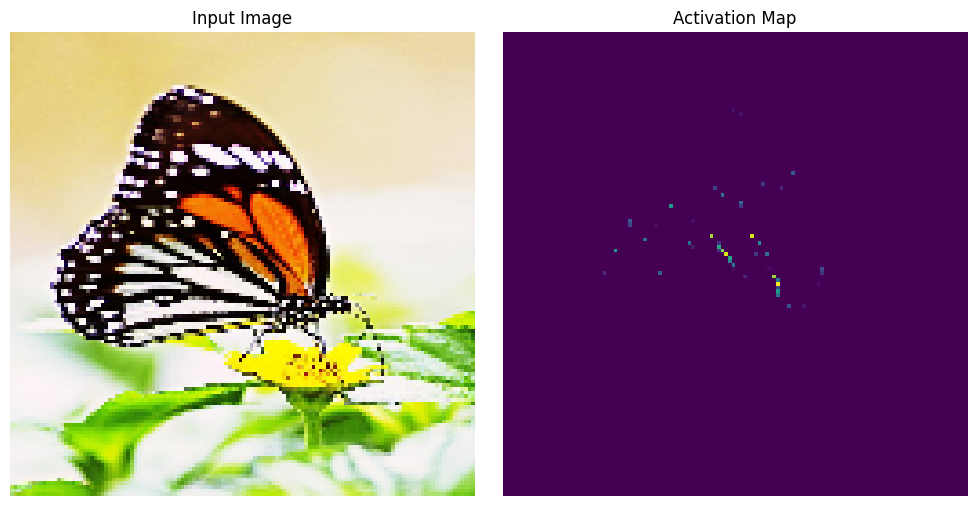

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.9843 - loss: 0.1663
Epoch 12/15
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9861 - loss: 0.1266(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


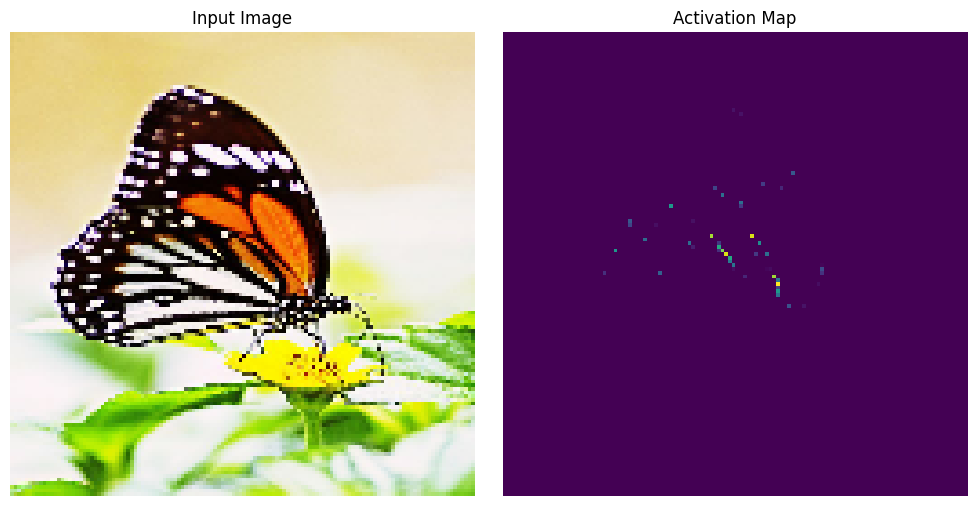

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.9855 - loss: 0.1374
Epoch 13/15
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9977 - loss: 0.1075(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


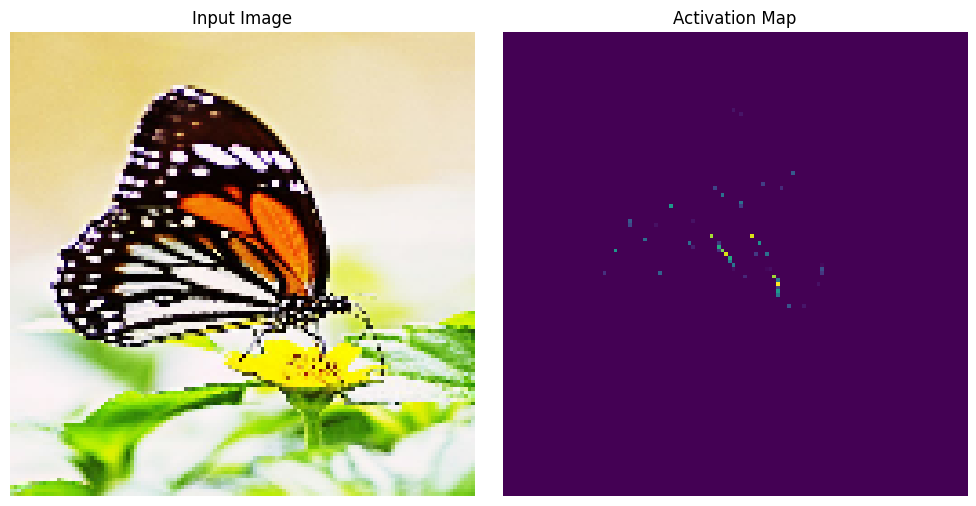

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.9973 - loss: 0.1146
Epoch 14/15
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9951 - loss: 0.0810(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


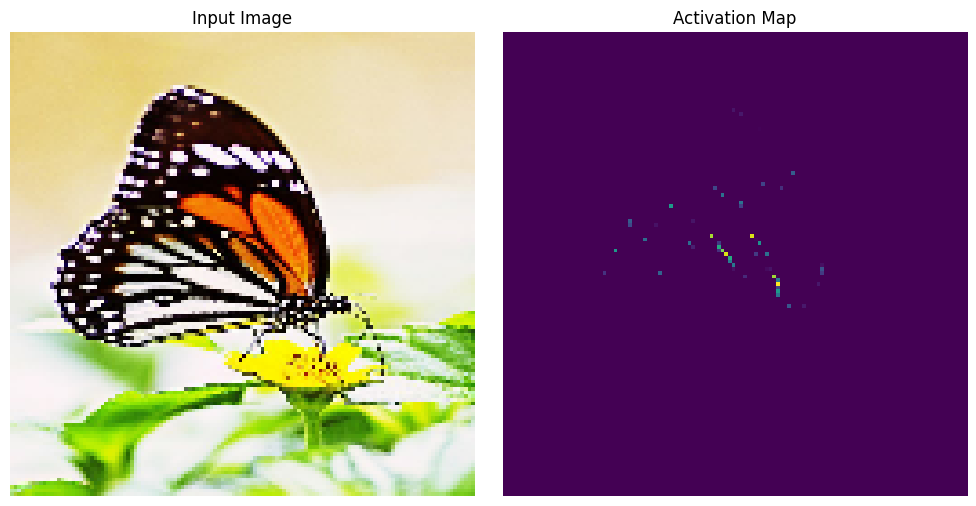

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.9953 - loss: 0.0862
Epoch 15/15
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9951 - loss: 0.0640(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


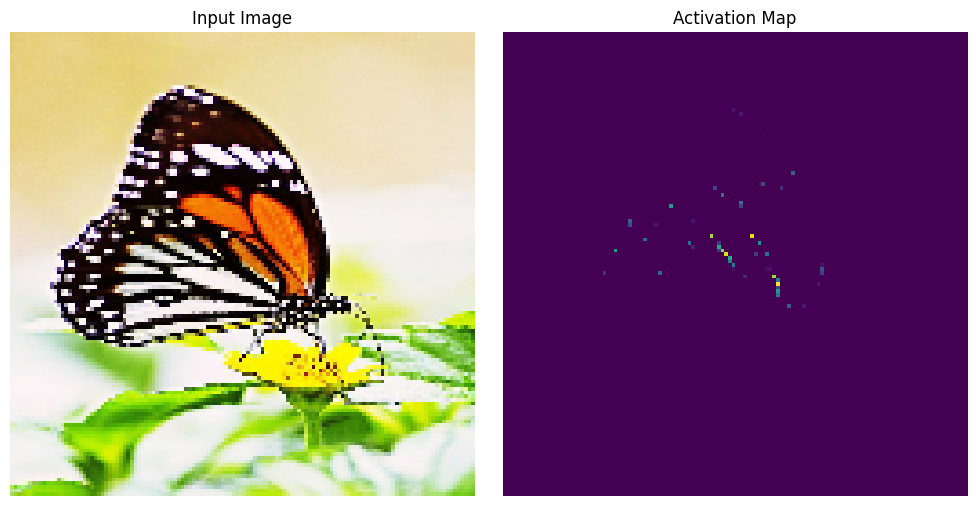

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.9953 - loss: 0.0681


In [45]:
history=model3.fit(five_dataset, epochs=15,callbacks=[ActivationMapCallback('conv2d_6',five_dataset)])